# Data Understanding Feature Engineering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import math

In [2]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   race_url                      589865 non-null  object        
 1   race_name                     589865 non-null  object        
 2   points                        589388 non-null  float64       
 3   uci_points                    251086 non-null  float64       
 4   length                        589865 non-null  float64       
 5   climb_total                   442820 non-null  float64       
 6   profile                       441671 non-null  float64       
 7   startlist_quality             589865 non-null  int64         
 8   date                          589865 non-null  datetime64[ns]
 9   position                      589859 non-null  float64       
 10  cyclist_url                   589865 non-null  object        
 11  cyclist_age  

In [4]:
'''
cyclist_climb_power
cyclist_previous_experience
cyclist_days_since_last_race
race_physical_effort
race_season
race_prestige
'''

'\ncyclist_climb_power\ncyclist_previous_experience\ncyclist_days_since_last_race\nrace_physical_effort\nrace_season\nrace_prestige\n'

### BMI Attribute

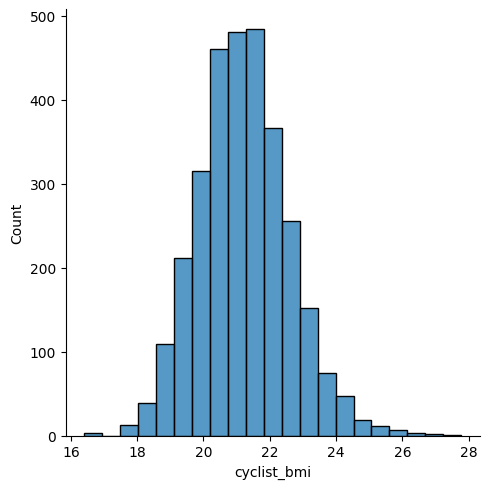

In [5]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_bmi', 'cyclist_url']), 
                x="cyclist_bmi", 
                kind="hist",
                row_order="desc",
                bins=n_bins)

<Axes: xlabel='cyclist_bmi', ylabel='cyclist_age_group'>

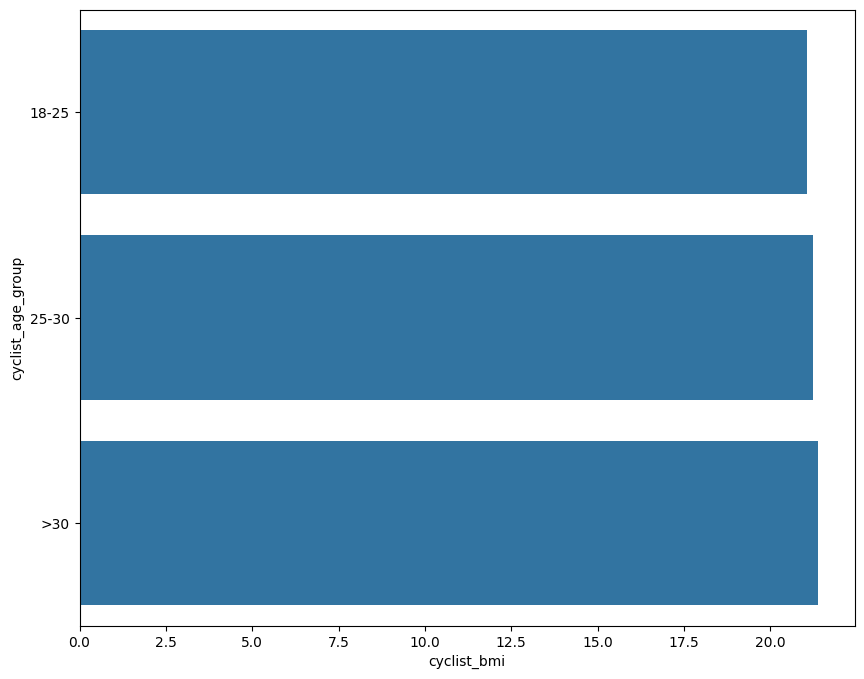

In [6]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset['cyclist_age_group'],
    'cyclist_bmi': dataset['cyclist_bmi'],
    'cyclist_url': dataset['cyclist_url'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
}).drop_duplicates(subset=['cyclist_url', 'race_name', 'year']) # vogliamo considerare ogni ciclista una sola volta per ogni edizione di una gara

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_bmi'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_bmi', data=tmp_mean[tmp_mean['cyclist_bmi'].notnull()], orient='h')

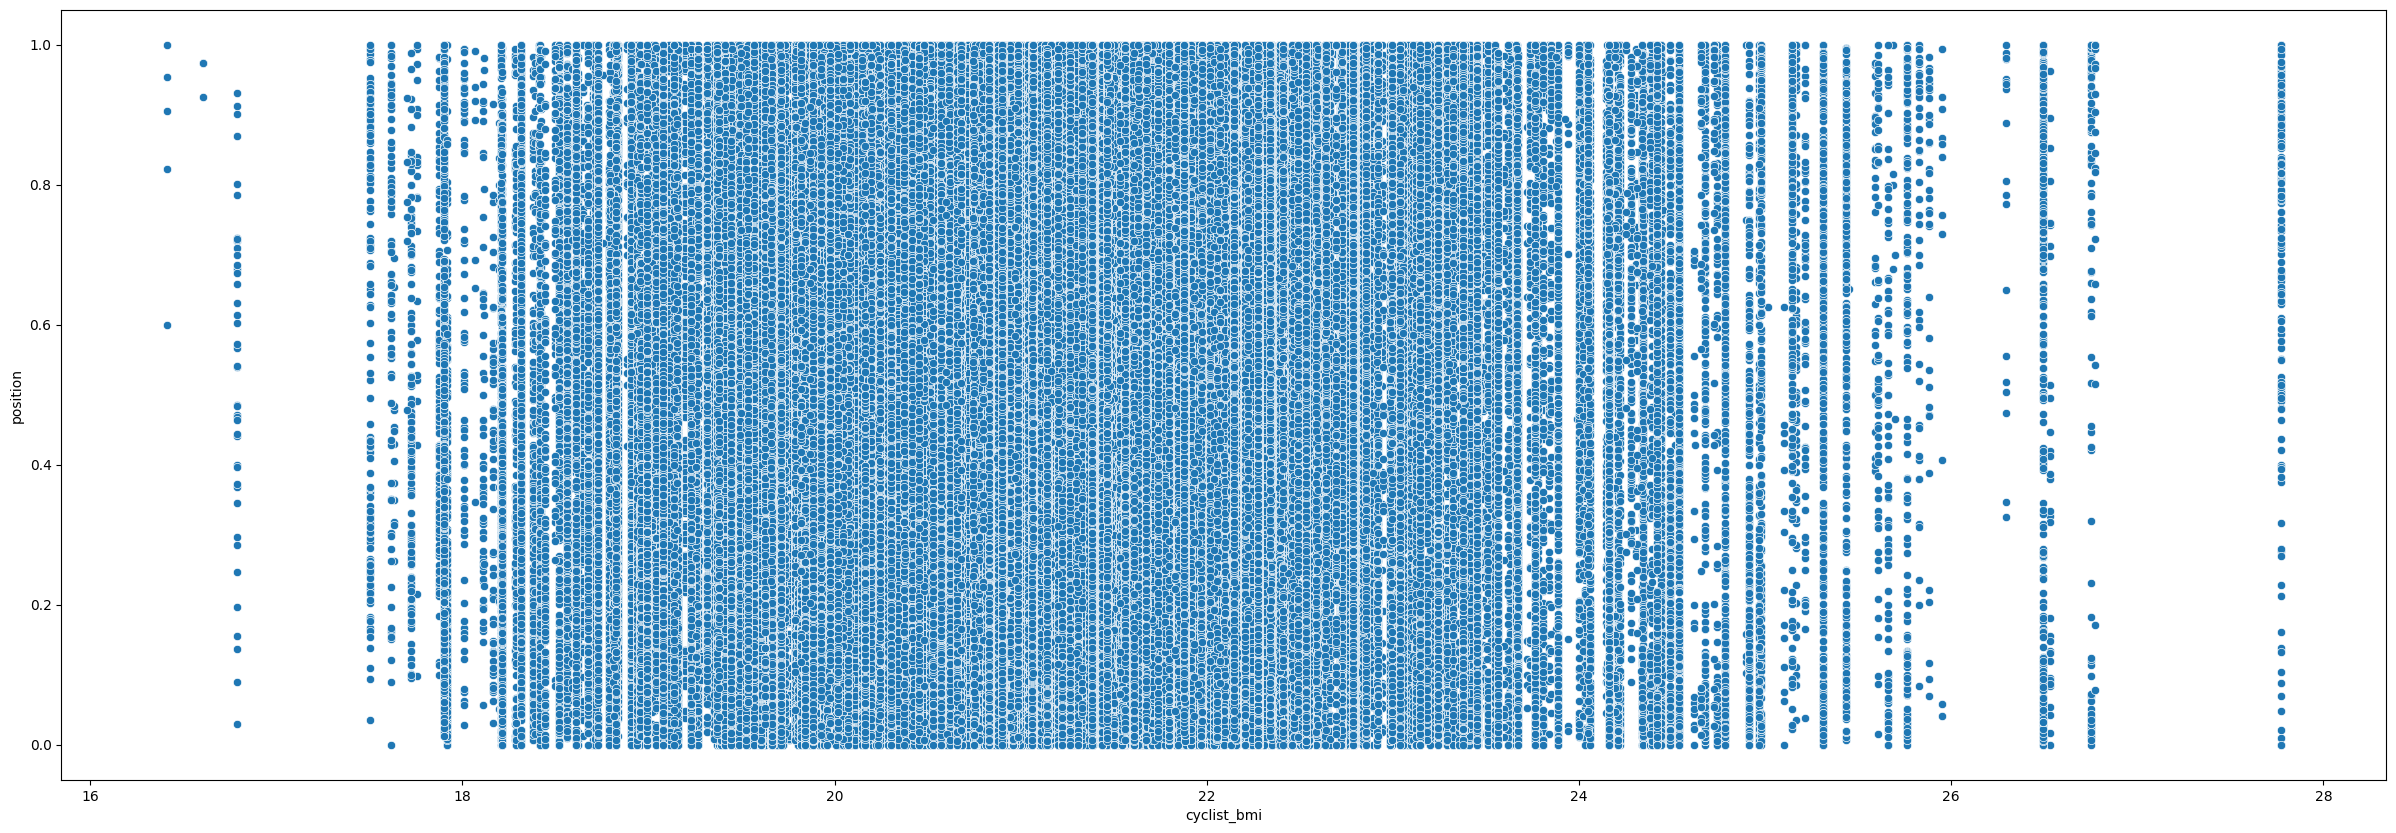

In [7]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='position', data=dataset)
plt.show()

nessuna correlazione evidente

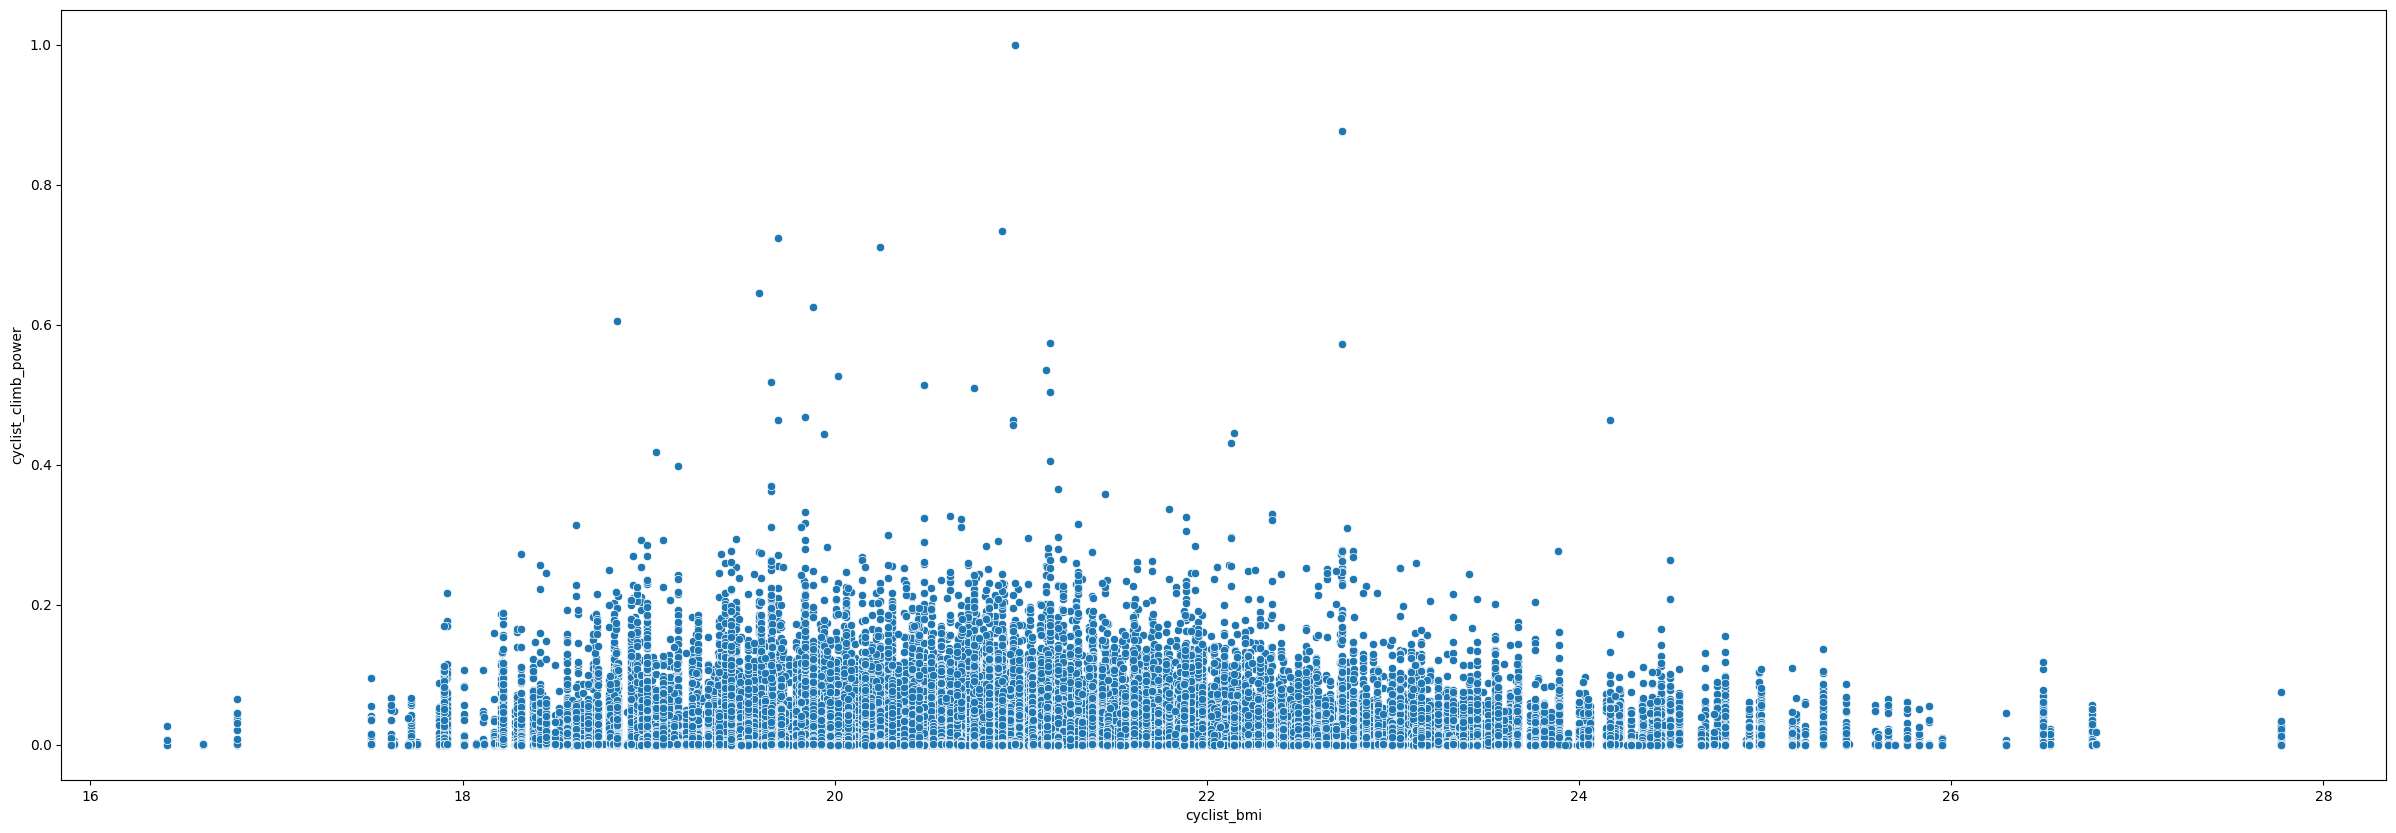

In [8]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='cyclist_climb_power', data=dataset)
plt.show()

Nota forma a campana, bmi medio sembra consentire power maggiori

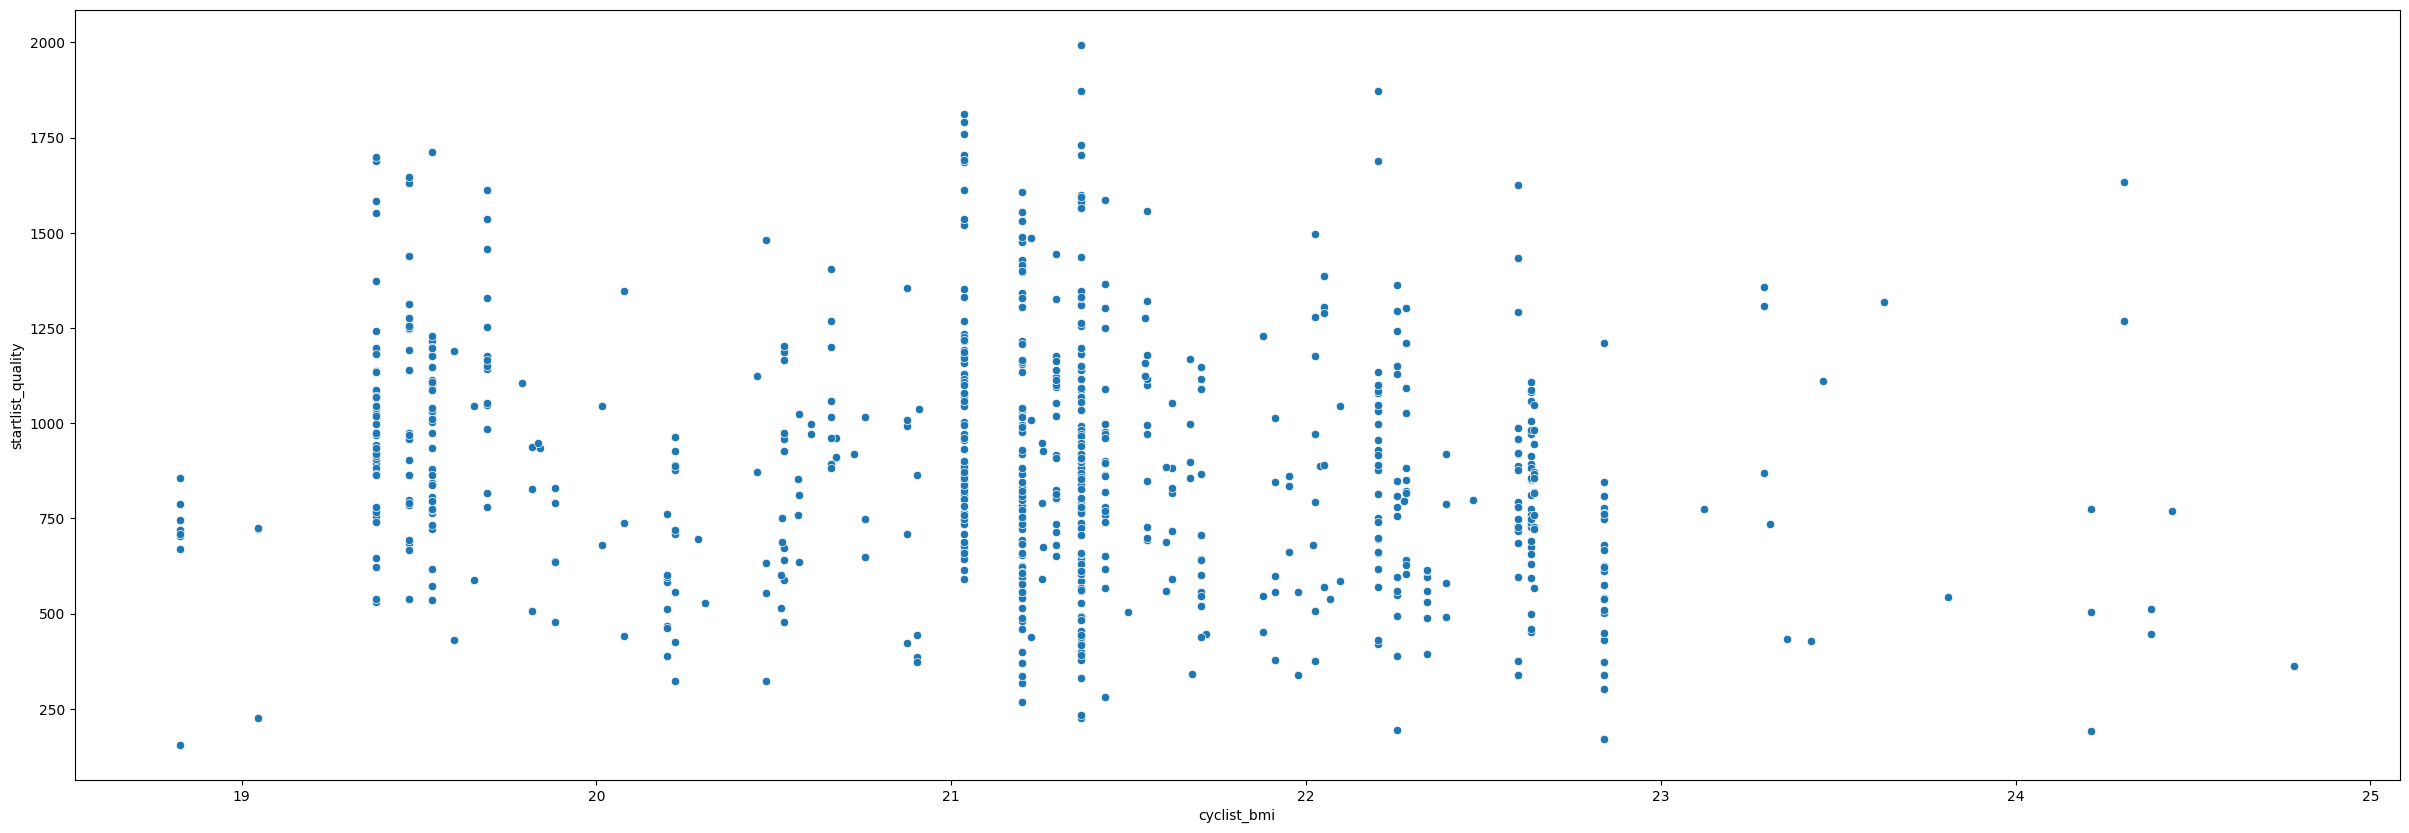

In [9]:
tmp_df = pd.DataFrame({
    'startlist_quality': dataset['startlist_quality'],
    'race_name': dataset['race_name'],
    'year': dataset['date'].dt.year,
    'cyclist_bmi': dataset['cyclist_bmi'],
}).drop_duplicates(subset=['race_name', 'year'])

plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_bmi', y='startlist_quality', data=tmp_df)
plt.show()

In [10]:
dataset.info()
# birth year, heigth -> float to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589865 entries, 0 to 589864
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   race_url                      589865 non-null  object        
 1   race_name                     589865 non-null  object        
 2   points                        589388 non-null  float64       
 3   uci_points                    251086 non-null  float64       
 4   length                        589865 non-null  float64       
 5   climb_total                   442820 non-null  float64       
 6   profile                       441671 non-null  float64       
 7   startlist_quality             589865 non-null  int64         
 8   date                          589865 non-null  datetime64[ns]
 9   position                      589859 non-null  float64       
 10  cyclist_url                   589865 non-null  object        
 11  cyclist_age  

### Age-Group Attribute

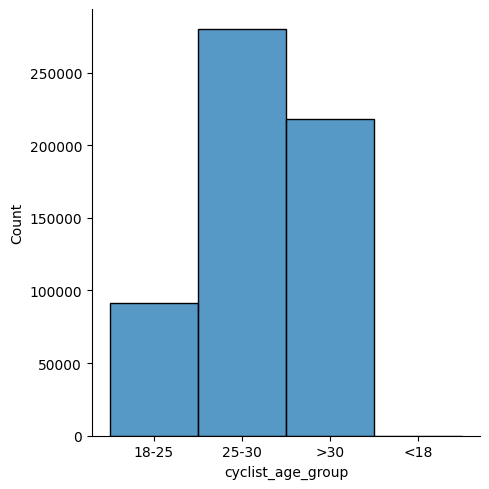

In [11]:
n_bins = dataset['cyclist_age_group'].nunique()

sb.displot(dataset, 
                x="cyclist_age_group", 
                kind="hist",
                row_order="desc",
                bins=n_bins) #TODO: fix labels' order

### Climb-Power Attribute

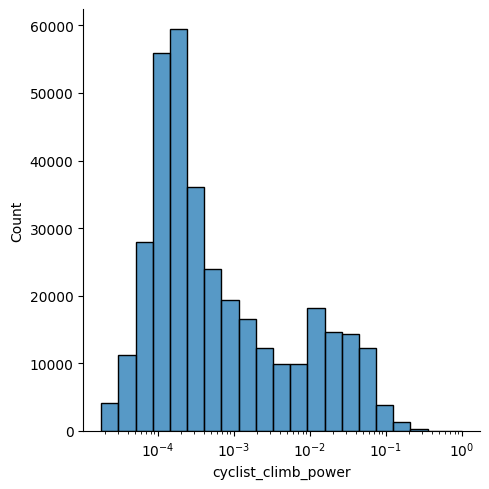

In [12]:
n_bins = math.ceil(math.log2(len(dataset)) + 1)

sb.displot(dataset.drop_duplicates(subset=['cyclist_climb_power', 'cyclist_url', 'date']), 
                x="cyclist_climb_power", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)

<Axes: xlabel='cyclist_climb_power', ylabel='cyclist_age_group'>

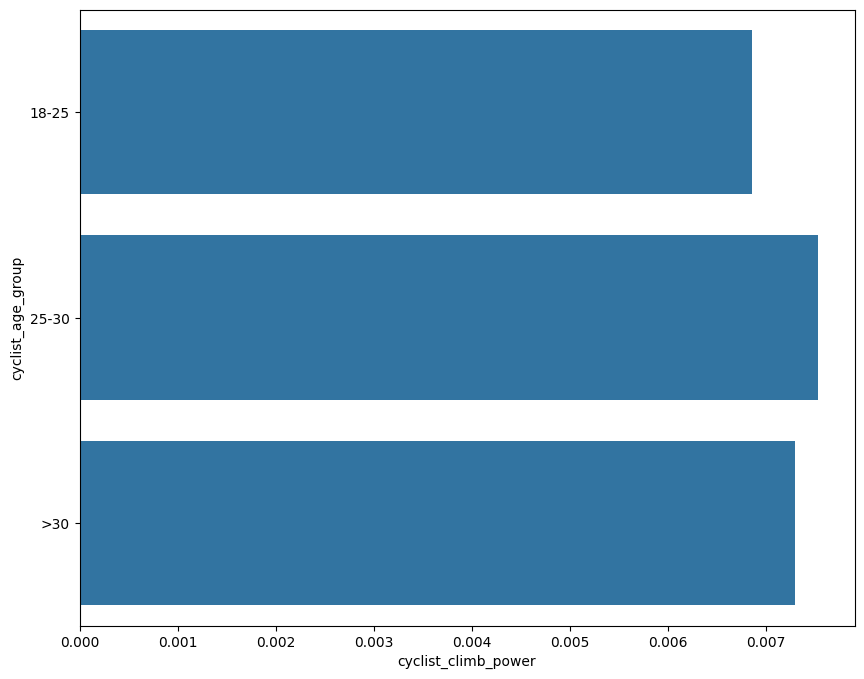

In [13]:
tmp_df = pd.DataFrame({
    'cyclist_age_group': dataset['cyclist_age_group'],
    'cyclist_climb_power': dataset['cyclist_climb_power'],
})

tmp_mean = tmp_df.groupby('cyclist_age_group')['cyclist_climb_power'].mean().reset_index()

plt.figure(figsize=(10, 8))
sb.barplot(y='cyclist_age_group', x='cyclist_climb_power', data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()], orient='h')

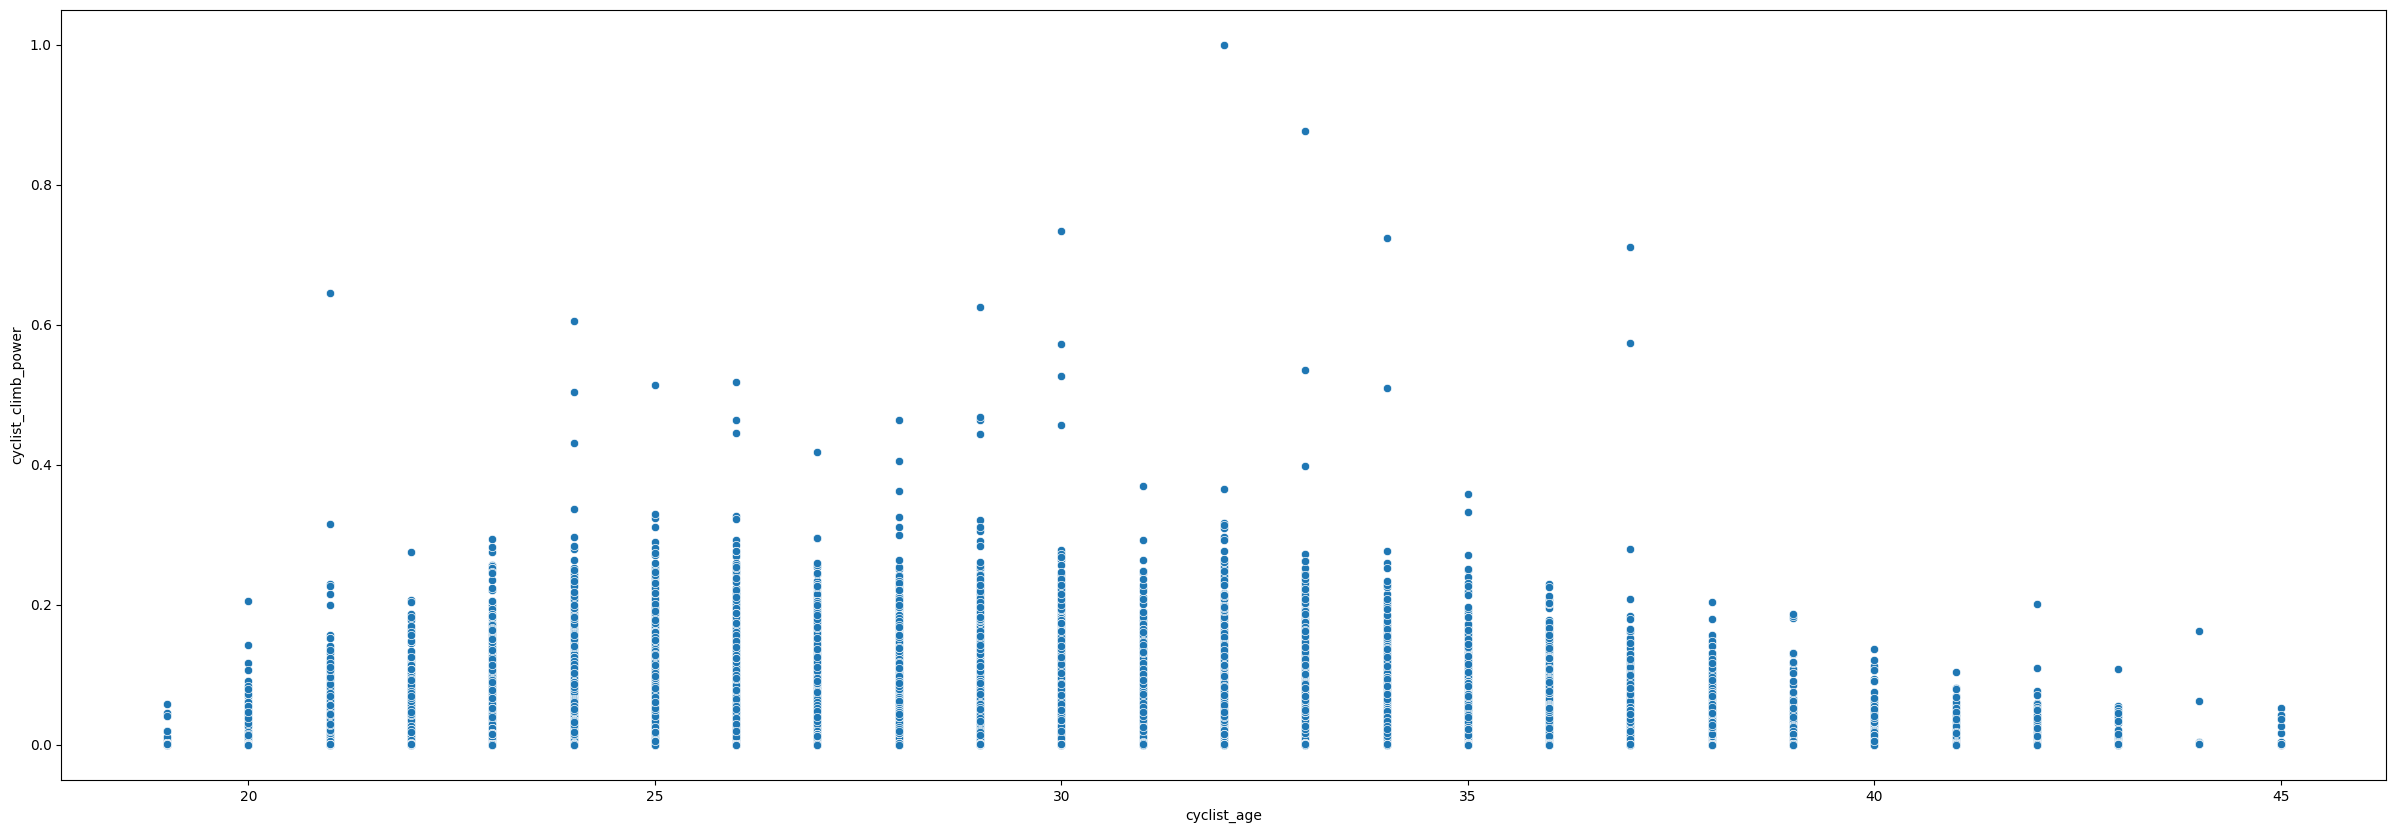

In [14]:
plt.figure(figsize=(30, 10))
sb.scatterplot(x='cyclist_age', y='cyclist_climb_power', data=dataset) #TODO: execute it with "nationality_groups" as color
plt.show()

Aumenta raggiunge apice poi diminuisce

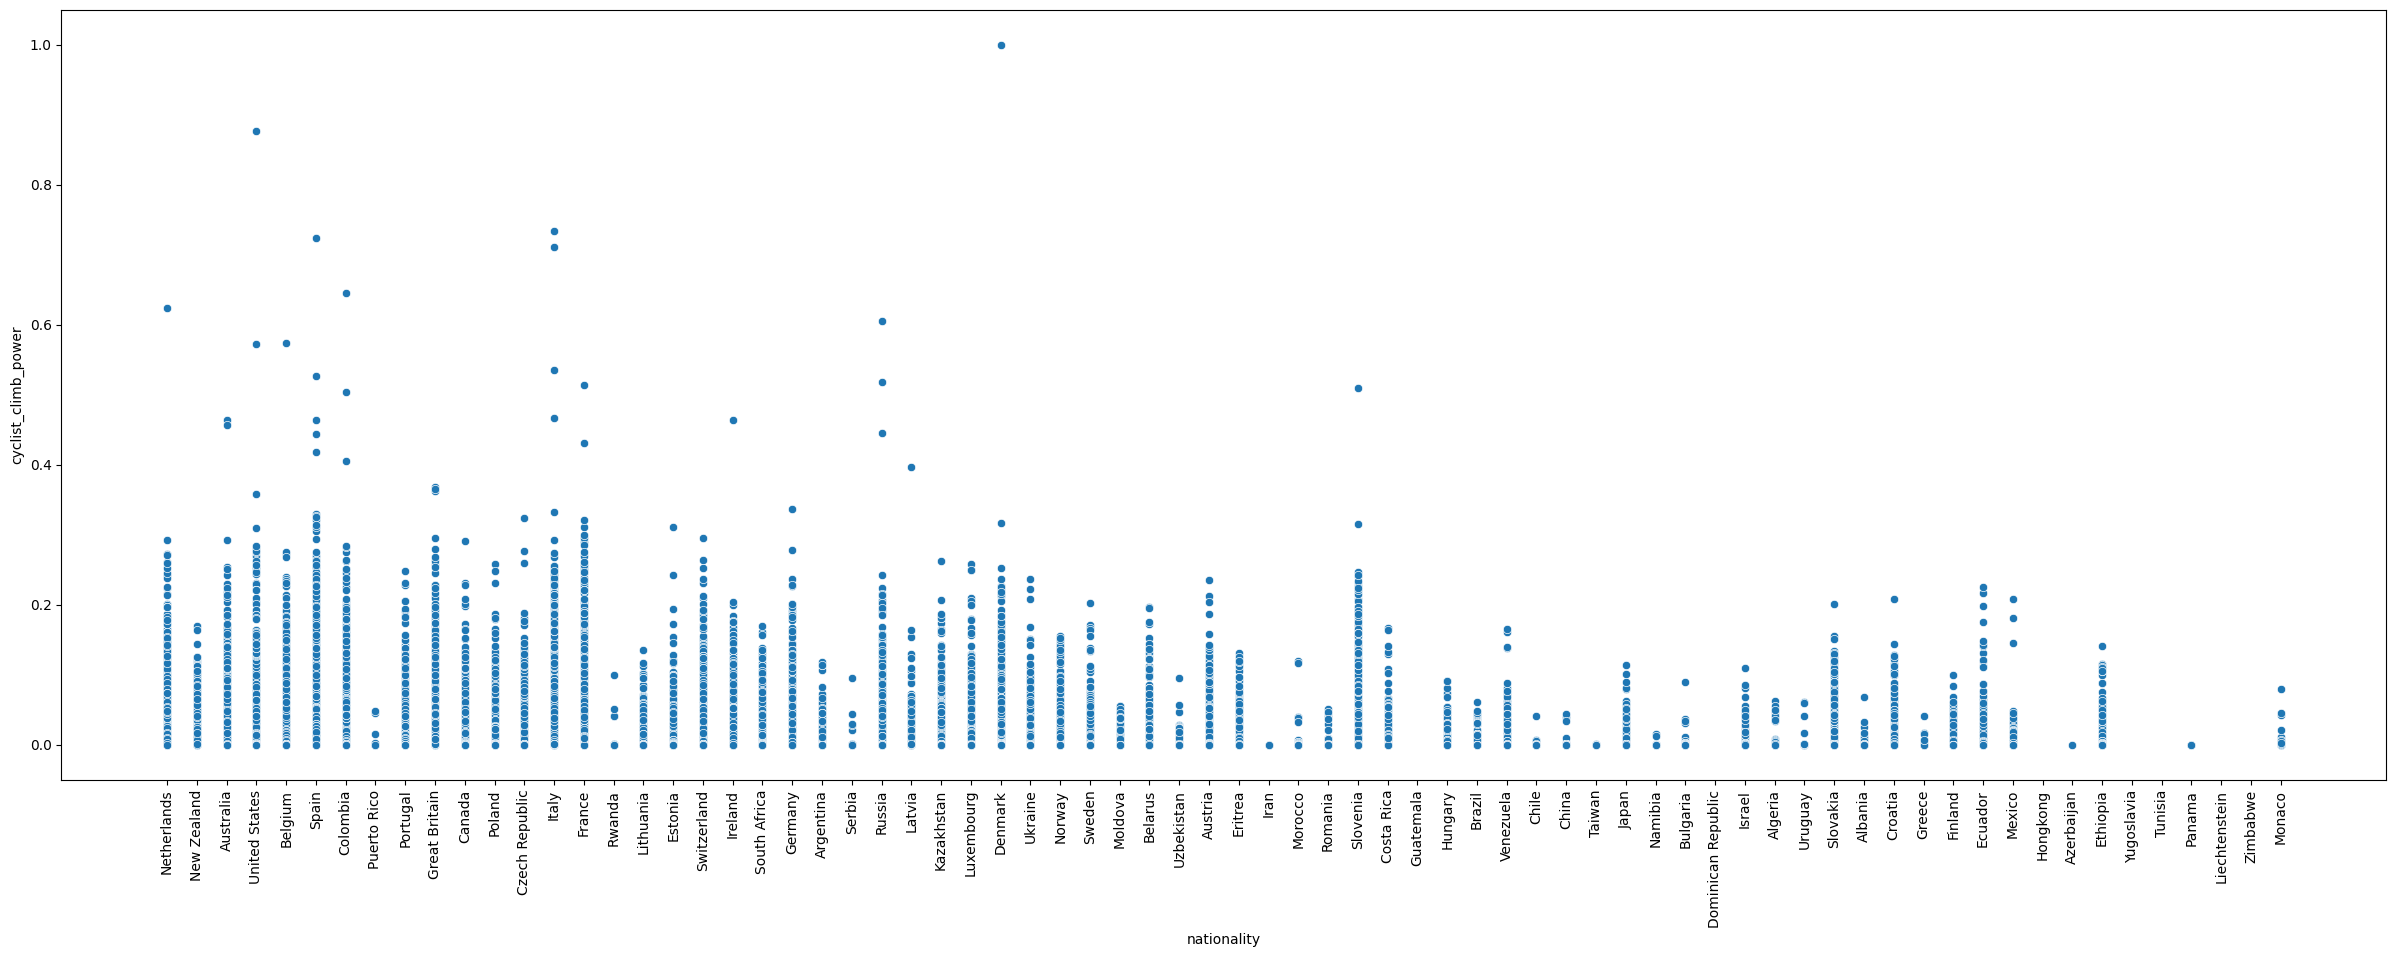

In [15]:
#TODO: provare a ordinare per climb_power medio, considerare gruppi di nazionalità, filtrare gare con poco climb_total e profile
plt.figure(figsize=(30, 10))
sb.scatterplot(x='nationality', y='cyclist_climb_power', data=dataset)
plt.xticks(rotation=90)
plt.show()

### Season Attribute

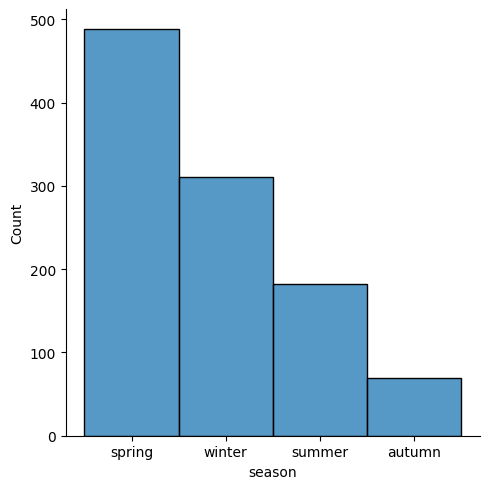

In [16]:
tmp_df = pd.DataFrame({
    'season': dataset['race_season'],
    'race_name': dataset['race_name'],
    'cyclist_climb_power': dataset['cyclist_climb_power'],
    'length': dataset['length'],
    'climb_percentage': dataset['climb_percentage'], 
    'profile': dataset['profile'],
    'year': dataset['date'].dt.year,
})

n_bins = 4

sb.displot(tmp_df.drop_duplicates(subset=['race_name', 'year']), 
                x="season", 
                kind="hist",
                row_order="desc",
                bins=n_bins, 
                log_scale=True)

<Axes: xlabel='cyclist_climb_power', ylabel='season'>

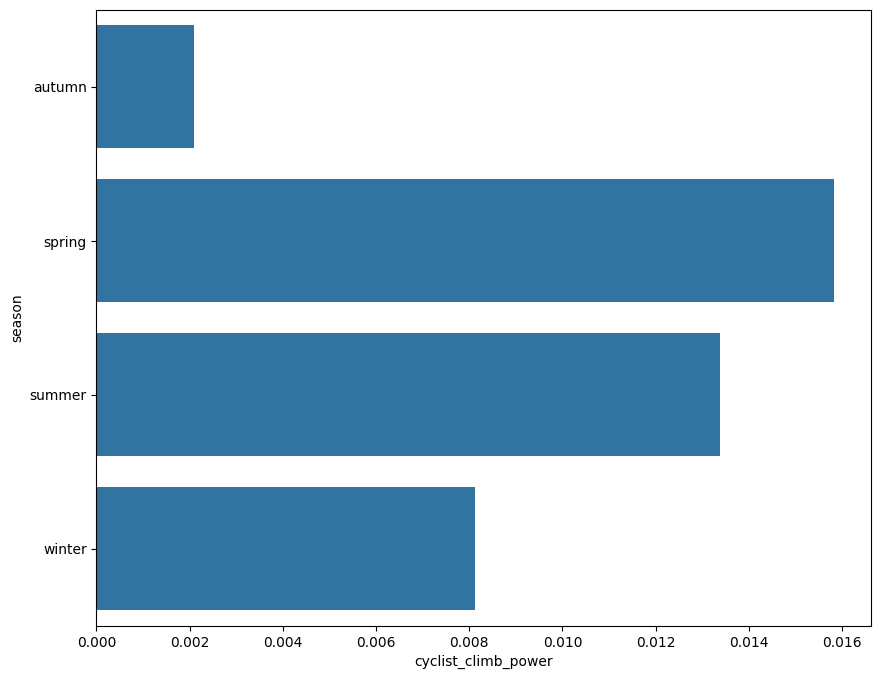

In [ ]:
tmp_mean = tmp_df[tmp_df['profile'] > 2].drop_duplicates(subset=['race_name', 'year']).groupby('season')['cyclist_climb_power'].mean().reset_index()
# avoid profile in {1,2} because they represent flat races
plt.figure(figsize=(10, 8))
sb.barplot(y='season', x='cyclist_climb_power', data=tmp_mean[tmp_mean['cyclist_climb_power'].notnull()], orient='h')

<Axes: xlabel='climb_percentage', ylabel='season'>

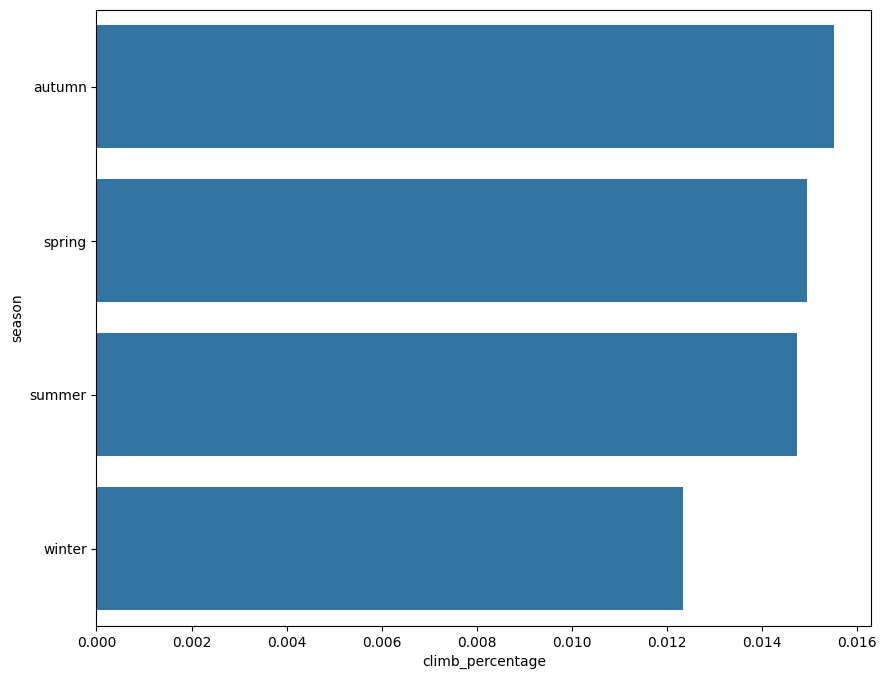

In [19]:
tmp_mean = tmp_df.groupby('season')['climb_percentage'].mean().reset_index()
# filtrare gare con poco climb_total e profile
plt.figure(figsize=(10, 8))
sb.barplot(y='season', x='climb_percentage', data=tmp_mean[tmp_mean['climb_percentage'].notnull()], orient='h')

Text(0.5, 1.0, 'Spring')

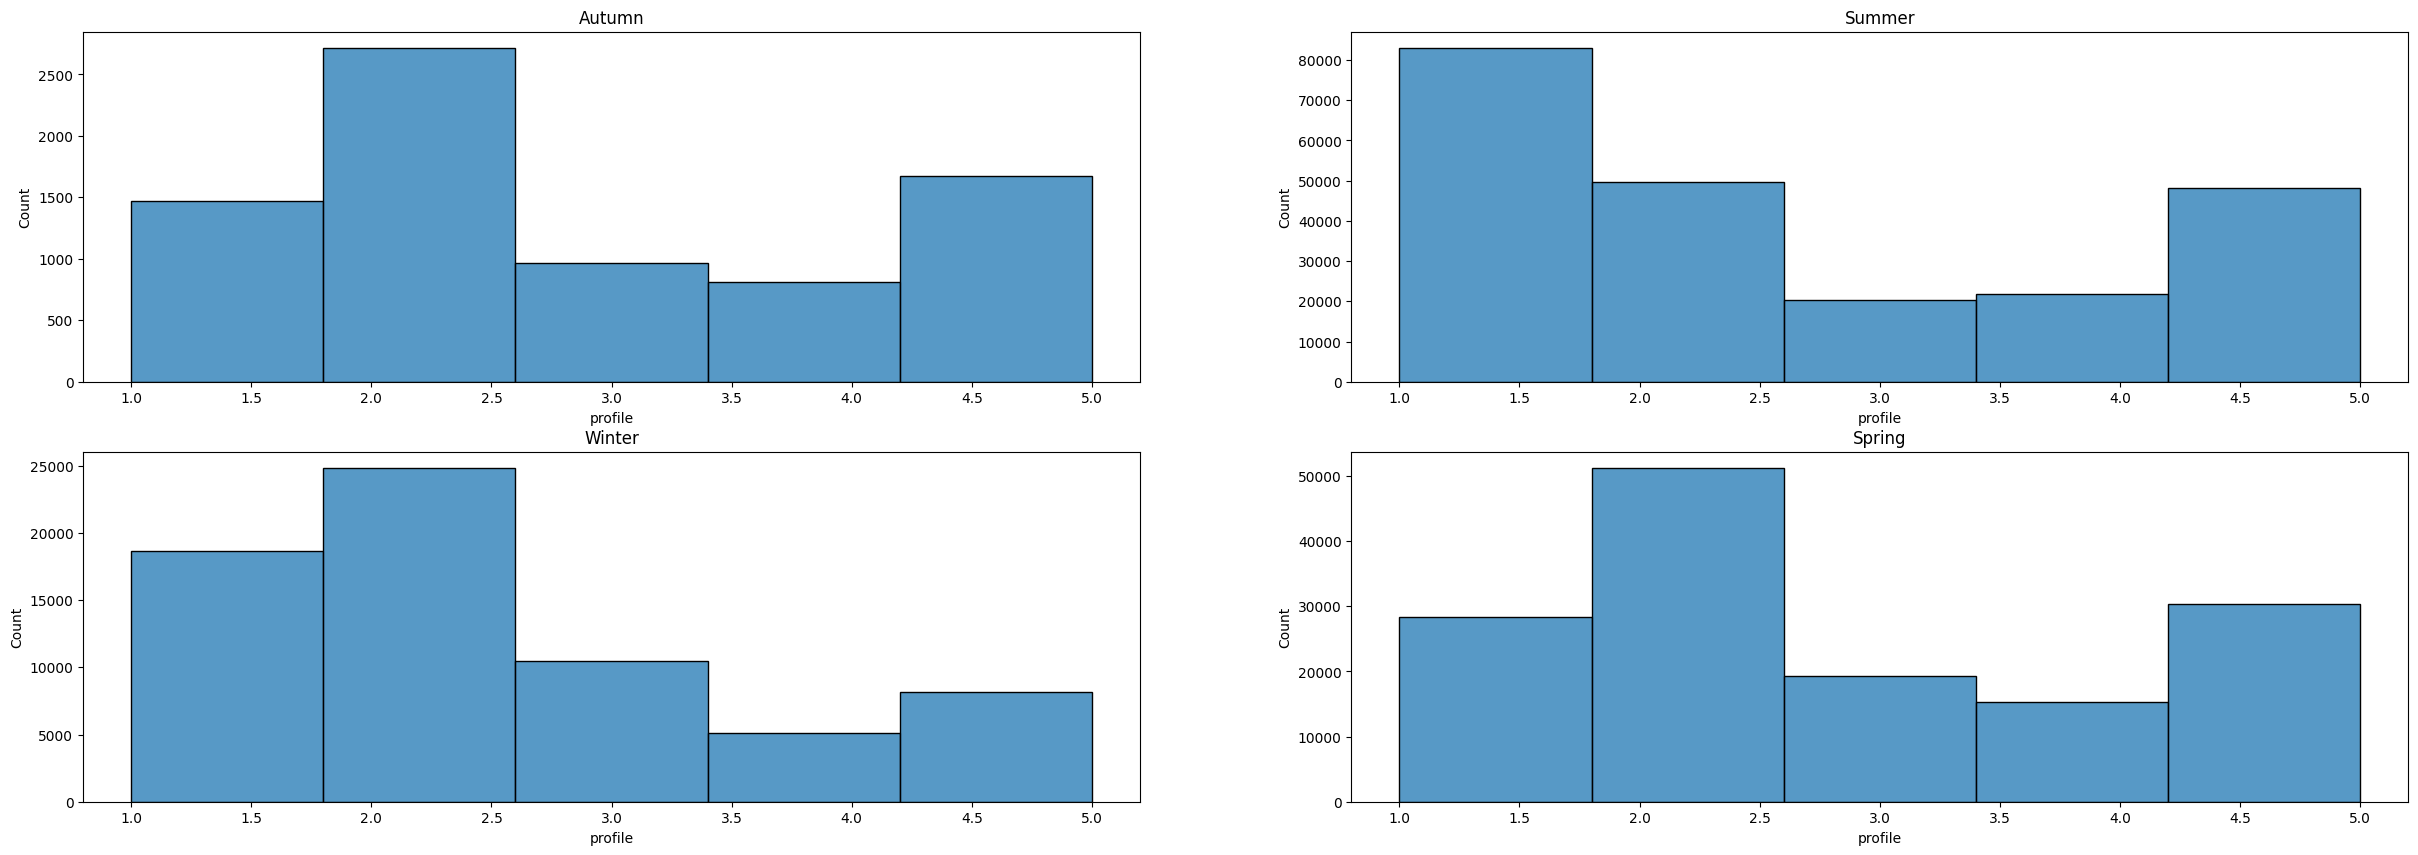

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(30, 10))

sb.histplot(tmp_df[tmp_df['season'] == 'autumn'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 0])
ax[0, 0].set_title('Autumn') 

sb.histplot(tmp_df[tmp_df['season'] == 'summer'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[0, 1]) 
ax[0, 1].set_title('Summer')

sb.histplot(tmp_df[tmp_df['season'] == 'winter'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 0]) 
ax[1, 0].set_title('Winter')

sb.histplot(tmp_df[tmp_df['season'] == 'spring'], 
            x="profile", 
            bins=5, 
            log_scale=False, 
            ax=ax[1, 1])
ax[1, 1].set_title('Spring') 